In [5]:
import sys
import numpy as np
from tqdm import tqdm
#!{sys.executable} -m pip install nilearn #install relevant package
from preprocessing import load_and_mask_miyawaki_data, plt_background
import matplotlib.pyplot as plt

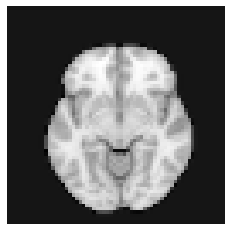

In [6]:
#Plot the pretty brain we are working on
plt_background()

In [81]:
fmri_data, stimuli, fmri_figures_data, stimuli_figures, masker = load_and_mask_miyawaki_data()

Preprocessing data...

Preprocessed fMRI data: 2860 samples x 5438 voxels
Preprocessed stimuli data: 2860 samples x 100 pixels
1536 geometrical figures


 Done (30.89s).


In [83]:
#erase black figs: useless for our use of the data
print(np.shape(stimuli))
print(np.shape(fmri_data))
        
stimuli2 = np.array([element for element in stimuli if np.sum(element) != -100])
fmri_data2 = np.array([fmri_data[i] for i in range(len(fmri_data)) if np.sum(stimuli[i]) != -100])

    
print(np.shape(stimuli2))
print(np.shape(fmri_data2))

(2860, 100)
(2860, 5438)
(1320, 100)
(1320, 5438)


In [84]:
#erase black figs: useless for our use of the data
print(np.shape(stimuli_figures))
print(np.shape(fmri_figures_data))
        
stimuli_figures2 = np.array([element for element in stimuli_figures if np.sum(element) != -100])
fmri_figures_data2 = np.array([fmri_figures_data[i] for i in range(len(fmri_figures_data)) if np.sum(stimuli_figures[i]) != -100])

    
print(np.shape(stimuli_figures2))
print(np.shape(fmri_figures_data2))

(1536, 100)
(1536, 5438)
(720, 100)
(720, 5438)


## First step: Decoding


Let's infer the binary visual stimulus presented to the subject from the recorded fMRI data.

Simple classification: X = fMRI data, y = binary stimuli

As done in Abraham et al., we first use a l1 logistic regression

Issue: the article is from 2014, so some of the code is deprecated: need to correct it

In [ ]:
"""from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

pipeline_LR = Pipeline(steps=[('selection', SelectKBest(f_classif, k=500)),('clf', LR(penalty='l1', C=0.05))])

scores_lr = []
# y_train = n_samples x n_voxels
# To iterate on voxels, we transpose it. 
for pixel in tqdm(y_train.T):
    score = cross_val_score(pipeline_LR, X_train, pixel, cv=5)
    scores_lr.append(score)"""

In [85]:
from sklearn.model_selection import train_test_split

train_to_test_ratio = 0.8
X_train, X_test, Y_train, Y_test =train_test_split(fmri_data2, stimuli2, 
                                        train_size=train_to_test_ratio, 
                                        test_size=1.0-train_to_test_ratio)

In [86]:
from sklearn import linear_model
from sklearn.preprocessing import scale

C_list = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

logreg_table = []
train_accuracy, test_accuracy = np.zeros(100), np.zeros(100)

#Train pixel by pixel: fit a logreg for each pixel
for i,pixel in tqdm(enumerate(np.transpose(Y_train))):
    
    # define logistic regressor
    logreg = linear_model.LogisticRegression(penalty='l2', C=0.05, max_iter = 10000)
    
    # fit training data
    logreg.fit(X_train, pixel)
    
    logreg_table.append(logreg)
    
    # check accuracy
    train_accuracy[i]=logreg.score(X_train,pixel)
    test_accuracy[i]=logreg.score(X_test,np.transpose(Y_test)[i])
    
    print('accuracy: train, test')
    print('liblin: %0.4f, %0.4f' %(train_accuracy[i],test_accuracy[i]) )

1it [00:01,  1.44s/it]

accuracy: train, test
liblin: 1.0000, 0.6780


2it [00:04,  2.22s/it]

accuracy: train, test
liblin: 1.0000, 0.6364


3it [00:06,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.6136


4it [00:09,  2.49s/it]

accuracy: train, test
liblin: 1.0000, 0.6098


5it [00:10,  2.10s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


6it [00:12,  1.86s/it]

accuracy: train, test
liblin: 1.0000, 0.5795


7it [00:15,  2.20s/it]

accuracy: train, test
liblin: 1.0000, 0.6098


8it [00:17,  2.36s/it]

accuracy: train, test
liblin: 1.0000, 0.5455


9it [00:19,  2.07s/it]

accuracy: train, test
liblin: 1.0000, 0.5606


10it [00:20,  1.87s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


11it [00:23,  2.21s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


12it [00:26,  2.40s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


13it [00:29,  2.50s/it]

accuracy: train, test
liblin: 1.0000, 0.6326


14it [00:32,  2.62s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


15it [00:33,  2.25s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


16it [00:36,  2.33s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


17it [00:38,  2.43s/it]

accuracy: train, test
liblin: 1.0000, 0.7197


18it [00:40,  2.11s/it]

accuracy: train, test
liblin: 1.0000, 0.6136


19it [00:43,  2.48s/it]

accuracy: train, test
liblin: 1.0000, 0.6477


20it [00:46,  2.56s/it]

accuracy: train, test
liblin: 1.0000, 0.6591


21it [00:48,  2.60s/it]

accuracy: train, test
liblin: 1.0000, 0.5644


22it [00:51,  2.57s/it]

accuracy: train, test
liblin: 1.0000, 0.6780


23it [00:53,  2.55s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


24it [00:56,  2.72s/it]

accuracy: train, test
liblin: 1.0000, 0.7008


25it [01:00,  2.90s/it]

accuracy: train, test
liblin: 1.0000, 0.7727


26it [01:03,  2.90s/it]

accuracy: train, test
liblin: 1.0000, 0.6364


27it [01:05,  2.73s/it]

accuracy: train, test
liblin: 1.0000, 0.7311


28it [01:09,  2.96s/it]

accuracy: train, test
liblin: 1.0000, 0.7083


29it [01:11,  2.83s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


30it [01:12,  2.39s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


31it [01:14,  2.08s/it]

accuracy: train, test
liblin: 1.0000, 0.6477


32it [01:16,  2.21s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


33it [01:19,  2.24s/it]

accuracy: train, test
liblin: 1.0000, 0.7765


34it [01:21,  2.19s/it]

accuracy: train, test
liblin: 1.0000, 0.7727


35it [01:23,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.8750


36it [01:26,  2.29s/it]

accuracy: train, test
liblin: 1.0000, 0.7955


37it [01:28,  2.26s/it]

accuracy: train, test
liblin: 1.0000, 0.8220


38it [01:29,  1.97s/it]

accuracy: train, test
liblin: 1.0000, 0.6818


39it [01:32,  2.23s/it]

accuracy: train, test
liblin: 1.0000, 0.6477


40it [01:35,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.6780


41it [01:37,  2.41s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


42it [01:40,  2.45s/it]

accuracy: train, test
liblin: 1.0000, 0.6856


43it [01:42,  2.36s/it]

accuracy: train, test
liblin: 1.0000, 0.7992


44it [01:44,  2.20s/it]

accuracy: train, test
liblin: 1.0000, 0.9432


45it [01:45,  1.88s/it]

accuracy: train, test
liblin: 1.0000, 0.9886


46it [01:46,  1.75s/it]

accuracy: train, test
liblin: 1.0000, 0.9697


47it [01:48,  1.69s/it]

accuracy: train, test
liblin: 1.0000, 0.9470


48it [01:50,  1.85s/it]

accuracy: train, test
liblin: 1.0000, 0.8485


49it [01:52,  2.02s/it]

accuracy: train, test
liblin: 1.0000, 0.7727


50it [01:54,  1.79s/it]

accuracy: train, test
liblin: 1.0000, 0.6780


51it [01:56,  1.94s/it]

accuracy: train, test
liblin: 1.0000, 0.6591


52it [01:58,  2.13s/it]

accuracy: train, test
liblin: 1.0000, 0.7462


53it [02:00,  1.84s/it]

accuracy: train, test
liblin: 1.0000, 0.7917


54it [02:01,  1.81s/it]

accuracy: train, test
liblin: 1.0000, 0.9129


55it [02:02,  1.59s/it]

accuracy: train, test
liblin: 1.0000, 0.9962


56it [02:03,  1.27s/it]

accuracy: train, test
liblin: 1.0000, 0.9811


57it [02:05,  1.41s/it]

accuracy: train, test
liblin: 1.0000, 0.9621


58it [02:07,  1.53s/it]

accuracy: train, test
liblin: 1.0000, 0.8864


59it [02:09,  1.80s/it]

accuracy: train, test
liblin: 1.0000, 0.7008


60it [02:11,  1.97s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


61it [02:14,  2.12s/it]

accuracy: train, test
liblin: 1.0000, 0.6742


62it [02:17,  2.42s/it]

accuracy: train, test
liblin: 1.0000, 0.6894


63it [02:19,  2.34s/it]

accuracy: train, test
liblin: 1.0000, 0.7424


64it [02:21,  2.23s/it]

accuracy: train, test
liblin: 1.0000, 0.7992


65it [02:23,  2.13s/it]

accuracy: train, test
liblin: 1.0000, 0.9242


66it [02:25,  2.13s/it]

accuracy: train, test
liblin: 1.0000, 0.9280


67it [02:26,  1.80s/it]

accuracy: train, test
liblin: 1.0000, 0.7879


68it [02:28,  1.95s/it]

accuracy: train, test
liblin: 1.0000, 0.7083


69it [02:30,  1.70s/it]

accuracy: train, test
liblin: 1.0000, 0.6932


70it [02:32,  1.94s/it]

accuracy: train, test
liblin: 1.0000, 0.6856


71it [02:34,  2.08s/it]

accuracy: train, test
liblin: 1.0000, 0.6326


72it [02:37,  2.24s/it]

accuracy: train, test
liblin: 1.0000, 0.7045


73it [02:39,  2.30s/it]

accuracy: train, test
liblin: 1.0000, 0.6856


74it [02:42,  2.39s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


75it [02:43,  2.03s/it]

accuracy: train, test
liblin: 1.0000, 0.7727


76it [02:46,  2.19s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


77it [02:49,  2.35s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


78it [02:50,  2.00s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


79it [02:52,  2.13s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


80it [02:55,  2.21s/it]

accuracy: train, test
liblin: 1.0000, 0.6326


81it [02:57,  2.40s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


82it [03:00,  2.43s/it]

accuracy: train, test
liblin: 1.0000, 0.6136


83it [03:03,  2.50s/it]

accuracy: train, test
liblin: 1.0000, 0.5644


84it [03:04,  2.12s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


85it [03:07,  2.33s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


86it [03:09,  2.41s/it]

accuracy: train, test
liblin: 1.0000, 0.6515


87it [03:12,  2.39s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


88it [03:14,  2.49s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


89it [03:17,  2.51s/it]

accuracy: train, test
liblin: 1.0000, 0.6136


90it [03:20,  2.55s/it]

accuracy: train, test
liblin: 1.0000, 0.5758


91it [03:21,  2.15s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


92it [03:23,  2.32s/it]

accuracy: train, test
liblin: 1.0000, 0.5871


93it [03:25,  2.04s/it]

accuracy: train, test
liblin: 1.0000, 0.6515


94it [03:27,  2.20s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


95it [03:30,  2.35s/it]

accuracy: train, test
liblin: 1.0000, 0.6061


96it [03:33,  2.43s/it]

accuracy: train, test
liblin: 1.0000, 0.6174


97it [03:36,  2.56s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


98it [03:37,  2.19s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


99it [03:38,  1.95s/it]

accuracy: train, test
liblin: 1.0000, 0.5947


100it [03:41,  2.22s/it]

accuracy: train, test
liblin: 1.0000, 0.5758


In [108]:
image = np.zeros(100)


n=50
xtest = fmri_figures_data2[n].reshape(1,-1)
ytest = np.reshape(stimuli_figures2[n],(10,10))

for i,pixel in enumerate(image) :
    #try: 
    y = logreg_table[i].predict(xtest)
    #except (truc pas train) :
    
    image[i] = y
    
image = np.reshape(image,(10,10))

from sklearn.preprocessing import Binarizer

image = Binarizer(threshold=0.5).fit_transform(image)

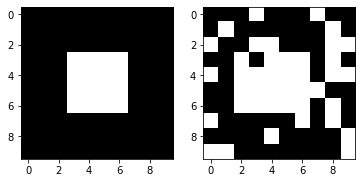

In [109]:
import matplotlib.pyplot as plt

fig = plt.figure()
sp1 = plt.subplot(121)
sp2 = plt.subplot(122)
sp1.imshow(ytest, cmap = plt.cm.gray, interpolation = 'nearest')
sp2.imshow(image, cmap = plt.cm.gray, interpolation = 'nearest')

In [ ]:
for i,pixel in tqdm(enumerate(np.transpose(Y_train))):

In [89]:
np.mean(test_accuracy)

0.6966287878787878

In [156]:
tot = 0

for i,elmnt in enumerate(stimuli) :
    print(np.sum(elmnt))

-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
46.0
46.0
46.0
-100.0
-100.0
-100.0
59.0
59.0
59.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
53.0
53.0
53.0
-100.0
-100.0
-100.0
40.0
40.0
40.0
-100.0
-100.0
-100.0
49.0
49.0
49.0
-100.0
-100.0
-100.0
59.0
59.0
59.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
55.0
55.0
55.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
57.0
57.0
57.0
-100.0
-100.0
-100.0
55.0
55.0
55.0
-100.0
-100.0
-100.0
43.0
43.0
43.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
45.0
45.0
45.0
-100.0
-100.0
-100.0
61.0
61.0
61.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
53.0
53.0
53.0
-100.0
-100.0
-100.0
57.0
57.0
57.0
-100.0
-10

## Second step: Encoding

In [1]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import KFold

cv = KFold(n_splits=10)

# Fit ridge model, calculate predictions on left out data
# and evaluate r^2 score for each voxel
scores = []
for train, test in tqdm(cv.split(y_train)):
    pred = (Ridge(alpha=100.).fit(y_train[train], X_train[train]).predict(y_train[test]))
    X_true = X_train[test]
    scores.append(1. - ((X_true - pred)** 2).sum(axis=0) /((X_true - X_true.mean(axis=0))** 2).sum(axis=0))
mean_scores = np.mean(scores, axis=0)


NameError: name 'tqdm' is not defined

In [19]:
from sklearn.linear_model import LassoLarsCV
# choose number of voxels to treat, set to None for all voxels
n_voxels = 50
# choose best voxels
indices = mean_scores.argsort()[::-1][:n_voxels]
lasso = LassoLarsCV(max_iter=10)
receptive_fields = [] 
for index in indices:
    lasso.fit(y_train, X_train[:, index])
    receptive_fields.append(lasso.coef_.
        reshape(10, 10))